In [65]:
import pandas as pd
import glob as glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Loading in ALL TFs as the background
all_TFs = glob.glob("../soto_analysis/outputs/mutations/cds_zoonomia_all_TF_cds/ENST*")
all_TFs = set([_.split("/")[-1].split(".")[0] for _ in all_TFs])
len(all_TFs)

1558

In [42]:
TF_enst_mappings = pd.read_csv("../output/TFs_with_ENST.csv", index_col = 0)
TF_enst_mappings = TF_enst_mappings[["uniprotID", "ENST"]]
SFARI_TFs = pd.read_csv("../data/SFARI_TFs_with_ENST_corrected.csv")[["uniprotID"]]
SFARI_TFs = pd.merge(SFARI_TFs, TF_enst_mappings)
SFARI_TFs["ENST"] = SFARI_TFs["ENST"].str.split(".").str[0]
SFARI_TFs

,uniprotID,ENST
0,Q9H2P0,ENST00000349014
1,Q5TGY3,ENST00000247087
2,Q96QS3,ENST00000379044
3,Q96JM3,ENST00000361283
4,Q96RK0,ENST00000681038
...,...,...
117,Q8NEK5,ENST00000366197
118,Q9BR84,ENST00000393883
119,Q68DY1,ENST00000601440
120,Q9Y462,ENST00000276123


In [43]:
# Loading in list of ALL SFARI TFs
SFARI_TF_ENSTs = set(SFARI_TFs["ENST"])
len(SFARI_TF_ENSTs)

122

In [44]:
def return_zoonomia_df(ENSTs):
    df = []
    for ENST in ENSTs:
        df.append(pd.read_csv("../soto_analysis/outputs/mutations/cds_zoonomia_all_TF_cds/" + ENST + ".bed", sep = "\t", header = None))
    return pd.concat(df)

In [46]:
all_minus_SFARI_TF_zoonomia = return_zoonomia_df(all_TFs - SFARI_TF_ENSTs)
all_minus_SFARI_TF_zoonomia

,0,1,2,3,4,5,6,7,8
0,15,35084193,35084194,ENST00000528386,-1,15,35084193,35084194,0.580
1,15,35084194,35084195,ENST00000528386,-1,15,35084194,35084195,0.454
2,15,35084195,35084196,ENST00000528386,-1,15,35084195,35084196,0.580
3,15,35084196,35084197,ENST00000528386,-1,15,35084196,35084197,0.454
4,15,35084197,35084198,ENST00000528386,-1,15,35084197,35084198,-0.793
...,...,...,...,...,...,...,...,...,...
2098,19,44158115,44158116,ENST00000426739,1,19,44158115,44158116,-0.111
2099,19,44158116,44158117,ENST00000426739,1,19,44158116,44158117,0.942
2100,19,44158117,44158118,ENST00000426739,1,19,44158117,44158118,0.240
2101,19,44158118,44158119,ENST00000426739,1,19,44158118,44158119,0.939


In [47]:
SFARI_TF_zoonomia = return_zoonomia_df(SFARI_TF_ENSTs)
SFARI_TF_zoonomia

,0,1,2,3,4,5,6,7,8
0,2,156325744,156325745,ENST00000339562,-1,2,156325744,156325745,6.360
1,2,156325745,156325746,ENST00000339562,-1,2,156325745,156325746,6.335
2,2,156325746,156325747,ENST00000339562,-1,2,156325746,156325747,5.852
3,2,156325747,156325748,ENST00000339562,-1,2,156325747,156325748,6.335
4,2,156325748,156325749,ENST00000339562,-1,2,156325748,156325749,6.335
...,...,...,...,...,...,...,...,...,...
5275,1,10693885,10693886,ENST00000377022,-1,1,10693885,10693886,8.480
5276,1,10693886,10693887,ENST00000377022,-1,1,10693886,10693887,8.480
5277,1,10693887,10693888,ENST00000377022,-1,1,10693887,10693888,6.038
5278,1,10693888,10693889,ENST00000377022,-1,1,10693888,10693889,6.062


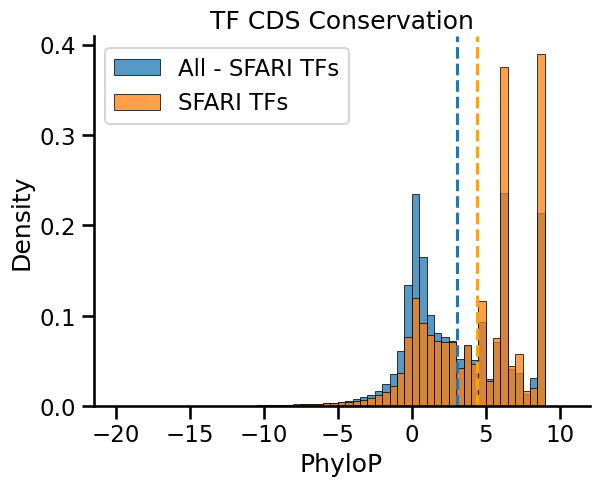

In [115]:
sns.set_context('talk')
bins = np.arange(-20, 10.6, 0.5)

plt.axvline(np.mean(all_minus_SFARI_TF_zoonomia[8]), linestyle = "--")
plt.axvline(np.mean(SFARI_TF_zoonomia[8]), color = "orange", linestyle = "--")

plt.title("TF CDS Conservation")
sns.histplot(all_minus_SFARI_TF_zoonomia[8], stat = "density", bins = bins, label = "All - SFARI TFs")
sns.histplot(SFARI_TF_zoonomia[8], stat = "density", bins = bins, label = "SFARI TFs")

plt.legend()

plt.xlabel("PhyloP")
sns.despine();

Now, only TFs with ADs

In [79]:
ENST_TFs_with_ADs = set(pd.read_csv("../soto_analysis/outputs/all_TFs_table_proteins.txt", sep = "\t")["ENST"])
len(ENST_TFs_with_ADs)

446

In [98]:
All_non_SFARI_TFs_with_ADs = return_zoonomia_df((ENST_TFs_with_ADs & all_TFs) - SFARI_TF_ENSTs)
All_non_SFARI_TFs_with_ADs

,0,1,2,3,4,5,6,7,8
0,14,23117487,23117488,ENST00000206513,-1,14,23117487,23117488,4.710
1,14,23117488,23117489,ENST00000206513,-1,14,23117488,23117489,6.043
2,14,23117489,23117490,ENST00000206513,-1,14,23117489,23117490,5.523
3,14,23117490,23117491,ENST00000206513,-1,14,23117490,23117491,3.908
4,14,23117491,23117492,ENST00000206513,-1,14,23117491,23117492,2.712
...,...,...,...,...,...,...,...,...,...
1783,18,22200819,22200820,ENST00000581694,1,18,22200819,22200820,4.174
1784,18,22200820,22200821,ENST00000581694,1,18,22200820,22200821,6.317
1785,18,22200821,22200822,ENST00000581694,1,18,22200821,22200822,5.775
1786,18,22200822,22200823,ENST00000581694,1,18,22200822,22200823,6.292


In [99]:
len((ENST_TFs_with_ADs & all_TFs) - SFARI_TF_ENSTs)

385

In [100]:
All_SFARI_TFs_with_ADs = return_zoonomia_df(ENST_TFs_with_ADs & SFARI_TF_ENSTs)
All_SFARI_TFs_with_ADs

,0,1,2,3,4,5,6,7,8
0,20,21511923,21511924,ENST00000377142,-1,20,21511923,21511924,8.818
1,20,21511924,21511925,ENST00000377142,-1,20,21511924,21511925,6.275
2,20,21511925,21511926,ENST00000377142,-1,20,21511925,21511926,8.818
3,20,21511926,21511927,ENST00000377142,-1,20,21511926,21511927,8.834
4,20,21511927,21511928,ENST00000377142,-1,20,21511927,21511928,6.287
...,...,...,...,...,...,...,...,...,...
5878,22,42215301,42215302,ENST00000359486,-1,22,42215301,42215302,8.693
5879,22,42215302,42215303,ENST00000359486,-1,22,42215302,42215303,8.799
5880,22,42215303,42215304,ENST00000359486,-1,22,42215303,42215304,6.262
5881,22,42215304,42215305,ENST00000359486,-1,22,42215304,42215305,6.287


In [94]:
len(ENST_TFs_with_ADs & SFARI_TF_ENSTs)

45

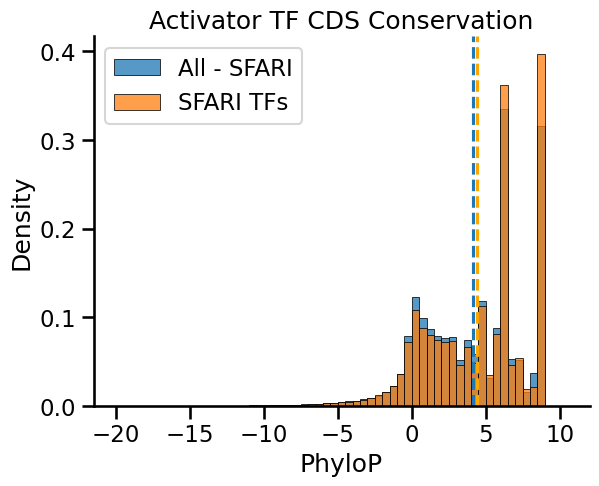

In [121]:
sns.set_context('talk')
bins = np.arange(-20, 10.6, 0.5)

plt.title("Activator TF CDS Conservation")

plt.axvline(np.mean(All_non_SFARI_TFs_with_ADs[8]), linestyle = "--")
plt.axvline(np.mean(All_SFARI_TFs_with_ADs[8]), color = "orange", linestyle = "--")

sns.histplot(All_non_SFARI_TFs_with_ADs[8], stat = "density", bins = bins, label = "All - SFARI")
sns.histplot(All_SFARI_TFs_with_ADs[8], stat = "density", bins = bins, label = "SFARI TFs")

plt.legend()

plt.xlabel("PhyloP")
sns.despine();

Activator vs non activator conservation?

In [117]:
activator_TFs =  return_zoonomia_df(ENST_TFs_with_ADs & all_TFs)
activator_TFs

,0,1,2,3,4,5,6,7,8
0,14,23117487,23117488,ENST00000206513,-1,14,23117487,23117488,4.710
1,14,23117488,23117489,ENST00000206513,-1,14,23117488,23117489,6.043
2,14,23117489,23117490,ENST00000206513,-1,14,23117489,23117490,5.523
3,14,23117490,23117491,ENST00000206513,-1,14,23117490,23117491,3.908
4,14,23117491,23117492,ENST00000206513,-1,14,23117491,23117492,2.712
...,...,...,...,...,...,...,...,...,...
1783,18,22200819,22200820,ENST00000581694,1,18,22200819,22200820,4.174
1784,18,22200820,22200821,ENST00000581694,1,18,22200820,22200821,6.317
1785,18,22200821,22200822,ENST00000581694,1,18,22200821,22200822,5.775
1786,18,22200822,22200823,ENST00000581694,1,18,22200822,22200823,6.292


In [118]:
not_activator_TFs = return_zoonomia_df(all_TFs - ENST_TFs_with_ADs)
not_activator_TFs

,0,1,2,3,4,5,6,7,8
0,1,204112916,204112917,ENST00000367204,1,1,204112916,204112917,6.346
1,1,204112917,204112918,ENST00000367204,1,1,204112917,204112918,8.776
2,1,204112918,204112919,ENST00000367204,1,1,204112918,204112919,3.730
3,1,204112919,204112920,ENST00000367204,1,1,204112919,204112920,7.101
4,1,204112920,204112921,ENST00000367204,1,1,204112920,204112921,4.982
...,...,...,...,...,...,...,...,...,...
751,2,73210925,73210926,ENST00000398468,1,2,73210925,73210926,3.835
752,2,73210926,73210927,ENST00000398468,1,2,73210926,73210927,2.862
753,2,73210927,73210928,ENST00000398468,1,2,73210927,73210928,2.120
754,2,73210928,73210929,ENST00000398468,1,2,73210928,73210929,2.101


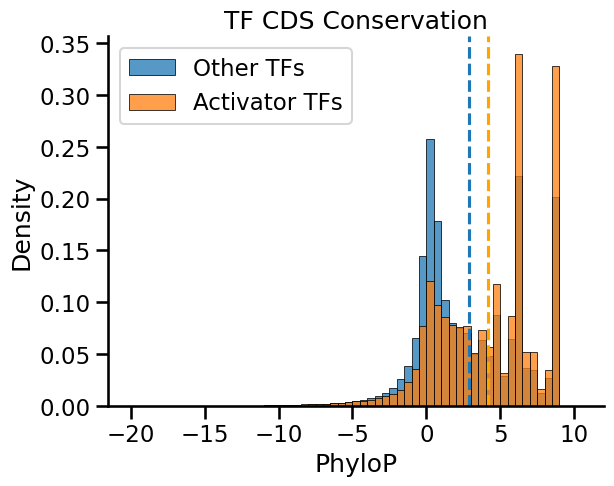

In [122]:
sns.set_context('talk')
bins = np.arange(-20, 10.6, 0.5)

plt.title("TF CDS Conservation")

plt.axvline(np.mean(not_activator_TFs[8]), linestyle = "--")
plt.axvline(np.mean(activator_TFs[8]), color = "orange", linestyle = "--")

sns.histplot(not_activator_TFs[8], stat = "density", bins = bins, label = "Other TFs")
sns.histplot(activator_TFs[8], stat = "density", bins = bins, label = "Activator TFs")

plt.legend()

plt.xlabel("PhyloP")
sns.despine();